In [63]:
from GetInfoFromDrive import *

In [64]:
id = 40415
segment = 1
extension = 1
filter ='um2'
HDR,CAT = get_file(id,segment,filter,extension,'smc')

Found Catalog
Found Image


In [3]:
import matplotlib.pyplot as plt 
from astropy.visualization import ZScaleInterval
Z = ZScaleInterval()

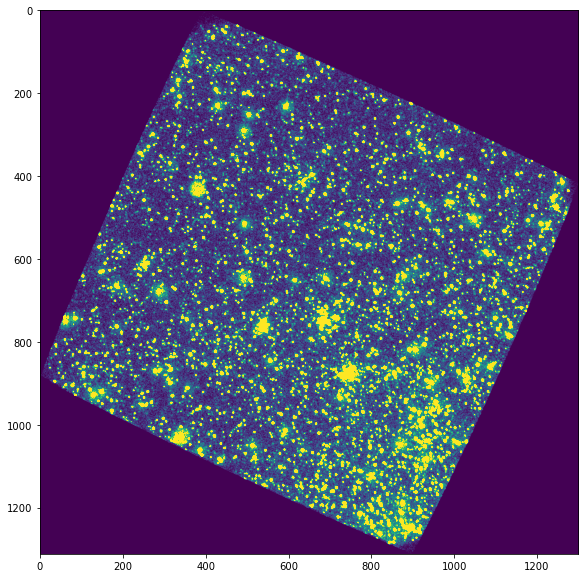

In [4]:
data = HDR[0].data
vmin,vmax = Z.get_limits(data)
plt.figure(figsize=(10,10))
plt.imshow(data,vmin=vmin,vmax=vmax)

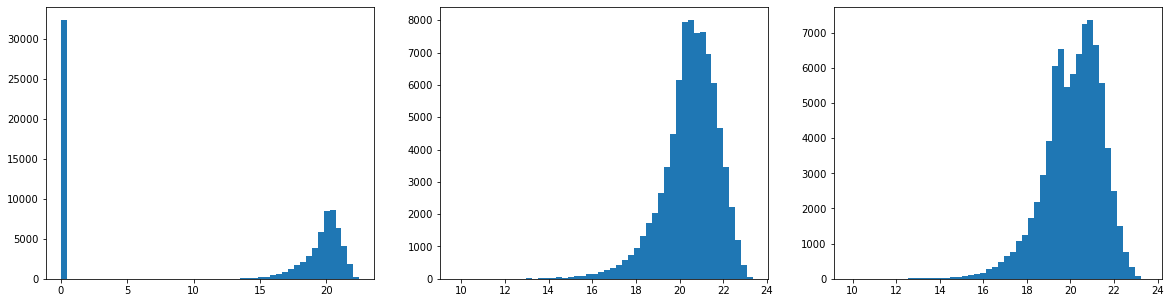

In [5]:
f,axes = plt.subplots(1,3,figsize=(20,5))
bins = 50
axes[0].hist(CAT.Umag,bins=bins);   # Why are there so many 0's in Uband? # Maybe use B band as the cut out 
axes[1].hist(CAT.Bmag,bins=bins);
axes[2].hist(CAT.Vmag,bins=bins);

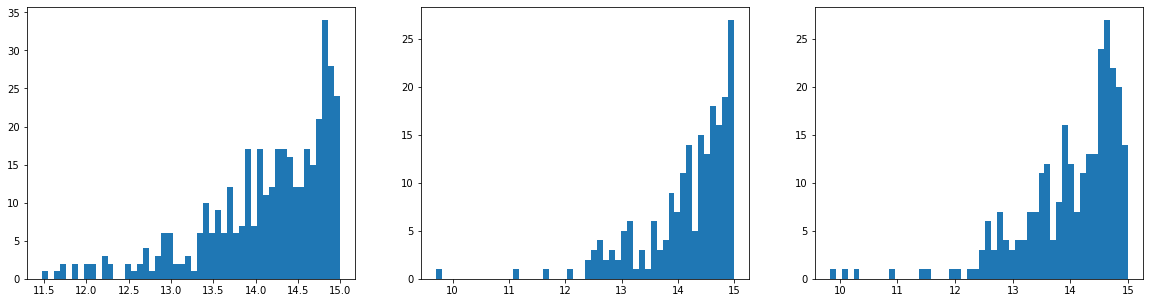

In [6]:
f,axes = plt.subplots(1,3,figsize=(20,5))  # Zooming 
bins = 50
axes[0].hist(CAT.Umag[(CAT.Umag < 15) & CAT.Umag != 0 ],bins=bins);   
axes[1].hist(CAT.Bmag[CAT.Bmag < 15 ],bins=bins);
axes[2].hist(CAT.Vmag[CAT.Vmag < 15 ],bins=bins);

In [7]:
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord 
import astropy.units as u
from regions import PixCoord, CirclePixelRegion
import numpy as np 


co = SkyCoord(CAT['RAhr'],CAT['DEdeg'],unit=(u.hourangle,u.deg))
x,y = co.to_pixel(WCS(HDR[0].header))
CAT['X'] = x
CAT['Y'] = y

# X = CAT[(CAT.Umag < 15) & (CAT.Umag != 0)].X
# Y = CAT[(CAT.Umag < 15) & (CAT.Umag != 0)].Y

X = CAT[(CAT.Bmag < 14.5)].X
Y = CAT[(CAT.Bmag < 14.5)].Y



# Junkyard
# get all coordinates in image.
# x_shape,y_shape = np.shape(data)
# x,y = np.meshgrid(np.arange(y_shape),np.arange(x_shape))
# x,y = x.flatten(),y.flatten()

# # if coordinate is within a defined region make it 0.
# for X,Y in zip(x[index_to_zero],y[index_to_zero]):
#     center = PixCoord(x=X,y=Y)
#     radius = 25
#     region = CirclePixelRegion(center, radius)
#     for w,z in zip(w_shape,z_shape):
#         if PixCoord(w,z) in region and w < data.shape[0] and z < data.shape[1]:
#             print(z,w,data[z,w])
#             data[z,w] = 0

# radius = 5
# region = 2 * np.pi * radius
# for X,Y in zip(x[index_to_zero],y[index_to_zero]):
#     for x_,y_ in zip(x,y): 
#         d = np.sqrt((x_ - X)**2+(y_ - Y)**2)
#         if d < region and x_ < x_shape - 1 and y_ < y_shape - 1:
#             data[y_,x_] = 0


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-OBS to 55466.000949 from DATE-OBS.
Set MJD-END to 55466.003194 from DATE-END'. [astropy.wcs.wcs]


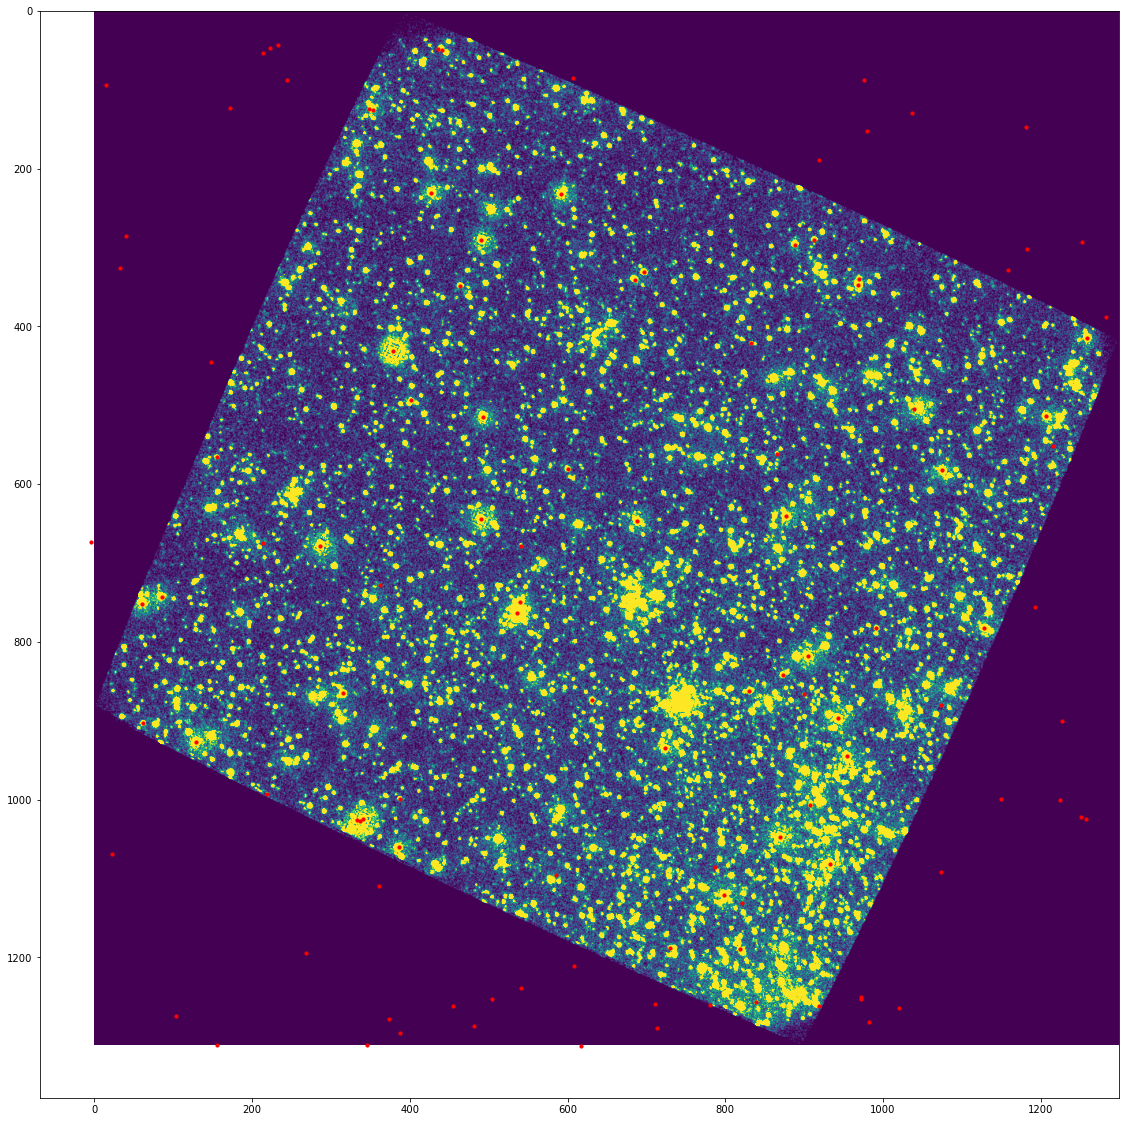

In [8]:
vmin,vmax = Z.get_limits(data)
plt.figure(figsize=(20,20))
plt.imshow(data,vmin=vmin,vmax=vmax)
plt.scatter(X,Y,s=10,c='r')
#plt.scatter(x,y,s=10,c='lime')
#plt.xlim(600,900)
#plt.ylim(800,900)

(800.0, 900.0)

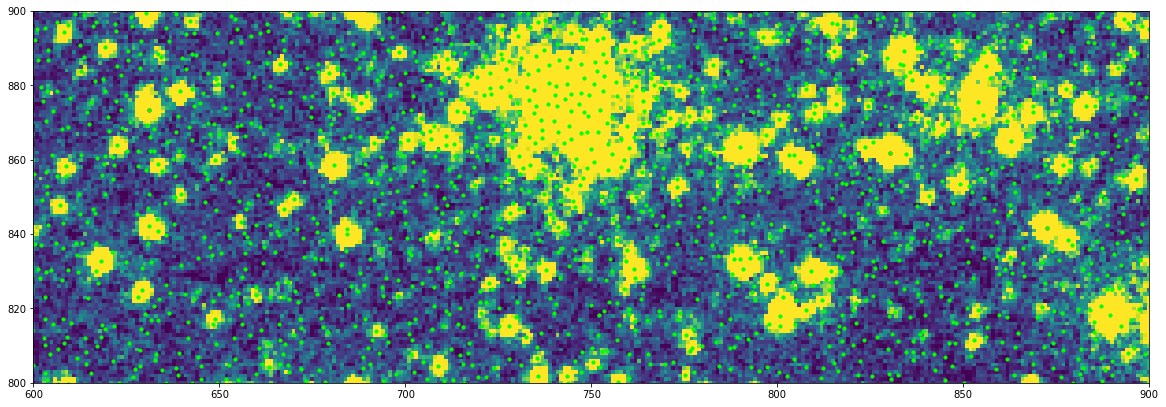

In [9]:
vmin,vmax = Z.get_limits(data)
plt.figure(figsize=(20,20))
plt.imshow(data,vmin=vmin,vmax=vmax)
plt.scatter(X,Y,s=10,c='r')
plt.scatter(x,y,s=10,c='lime')
plt.xlim(600,900)
plt.ylim(800,900)

In [10]:
x_co = np.array([int(np.round(x)) for x in X[Y<1312]])
y_co = np.array([int(np.round(y)) for y in Y[Y<1312]])

In [11]:
np.max(y_co)

1311

In [12]:
y_co

array([ 388,  415,  293, 1024, 1022,  901, 1001,  552,  514,  756,  302,
        147,  329,  999,  782,  582,  880, 1091,  504,  130, 1265,  783,
        153, 1282,   87,  339, 1250,  347, 1253,  945,  897, 1081,  189,
       1262,  290, 1007,  818,  866,  296,  641,  842, 1047,  561, 1257,
        421,  862, 1131, 1189, 1120, 1085, 1260, 1188,  935, 1290, 1259,
        331,  647,  341,  873, 1211,   86,  581,  233, 1096, 1239,  749,
        678,  763, 1253,  514,  644,  290, 1287,  348, 1262,   50,   49,
        231,  493, 1295,  999, 1060,  431, 1278, 1110,  728,  125, 1311,
        125, 1025, 1027, 1026,  865,  678, 1195,   88,   44,  993,   46,
        675,   53,  123, 1311,  566,  445,  927, 1274,  743,  903,  751,
        285,  326, 1068,   94,  673])

In [13]:
data.shape

(1312, 1299)

In [14]:
imgmap = np.zeros(data.shape)
imgmap[y_co,x_co] = 1

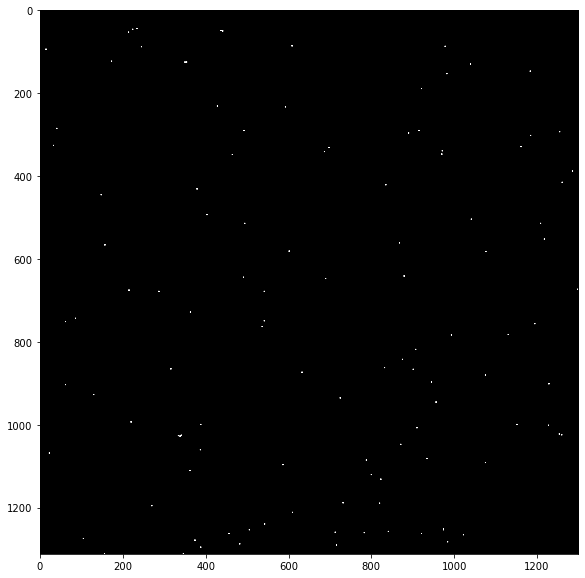

In [15]:

plt.figure(figsize=(10,10))
plt.imshow(imgmap,vmin=0,vmax=0.05,cmap='gray')
#plt.scatter(X,Y,s=10,c='r')

In [22]:
radius = 5
region = 2 * np.pi * radius
width = 3

In [25]:
circ = np.zeros((width*radius,width*radius))
cx,cy = np.meshgrid(np.arange(width*radius),np.arange(width*radius))
cx,cy = cx.flatten(),cy.flatten()


for c_x,c_y in zip(cx,cy): 
    d = np.sqrt((c_x - int(radius))**2+(c_y - int(radius))**2)
    #print(d,c_y,c_x)
    if d > radius: #and x_ < x_shape - 1 and y_ < y_shape - 1:
        #print(d,c_y,c_x)
        circ[c_y,c_x] = 100


In [115]:
circ[0,3]

100.0

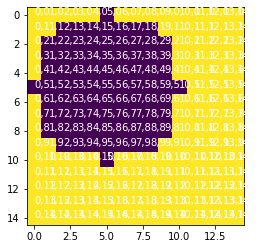

In [24]:
plt.imshow(circ,vmin=0,vmax=1)
[plt.text(ccx,ccy,f'{ccx},{ccy}',c='white') for ccx,ccy in zip(cy,cx)];

In [73]:
np.sqrt(8)#CAT[(CAT.Umag < 15) & (CAT.Umag != 0)]

2.8284271247461903

In [75]:
kernel = np.ones((radius,radius))

In [76]:
from scipy import ndimage


a = ndimage.convolve(imgmap, kernel, mode='constant', cval=0.0)

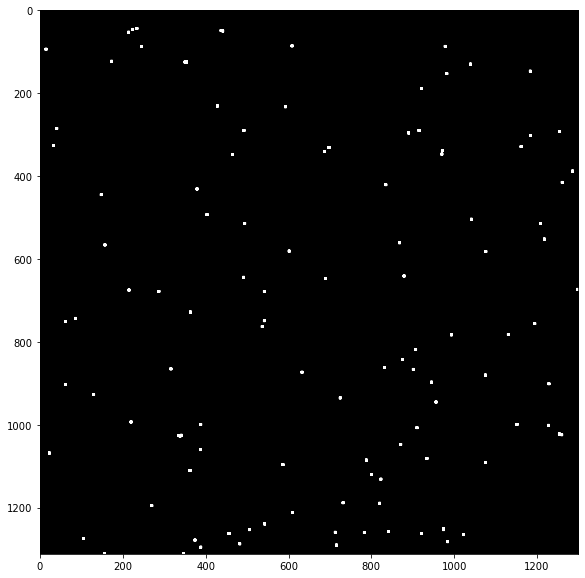

In [78]:
plt.figure(figsize=(10,10))
plt.imshow(a,vmin=0,vmax=0.05,cmap='gray')

(300.0, 350.0)

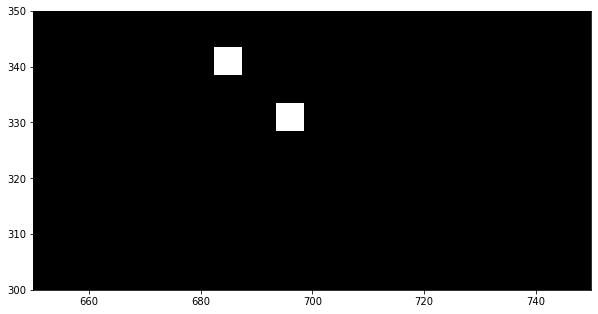

In [82]:
plt.figure(figsize=(10,10))
plt.imshow(a,vmin=0,vmax=0.05,cmap='gray')
plt.xlim(650,750)
plt.ylim(300,350)

In [27]:
from photutils.aperture import CircularAperture

In [30]:
np.shape(aper.positions)

(82333, 2)

In [77]:
aper = CircularAperture([x,y], 100)

a_x = aper.positions[:,0]
a_y = aper.positions[:,1]

a_x = a_x[a_y < 1299]
a_y = a_y[a_y < 1299]

aper_x = [int(np.round(x)) for x in a_x]
aper_y = [int(np.round(y)) for y in a_y]

In [75]:
aper[0].positions


array([1290.38776603,  302.74749549])

In [46]:
np.shape(aper.positions[:,0])

(82333,)

In [48]:
new_data = np.copy(data)

In [49]:
new_data[aper_y,aper_x] = 0

In [57]:
np.shape(HDR)

(1,)

In [69]:
HDR[0].header['_DELT2'] * 3600 # I guess it's basically 1" per pixel

1.003999981732632

(100.0, 300.0)

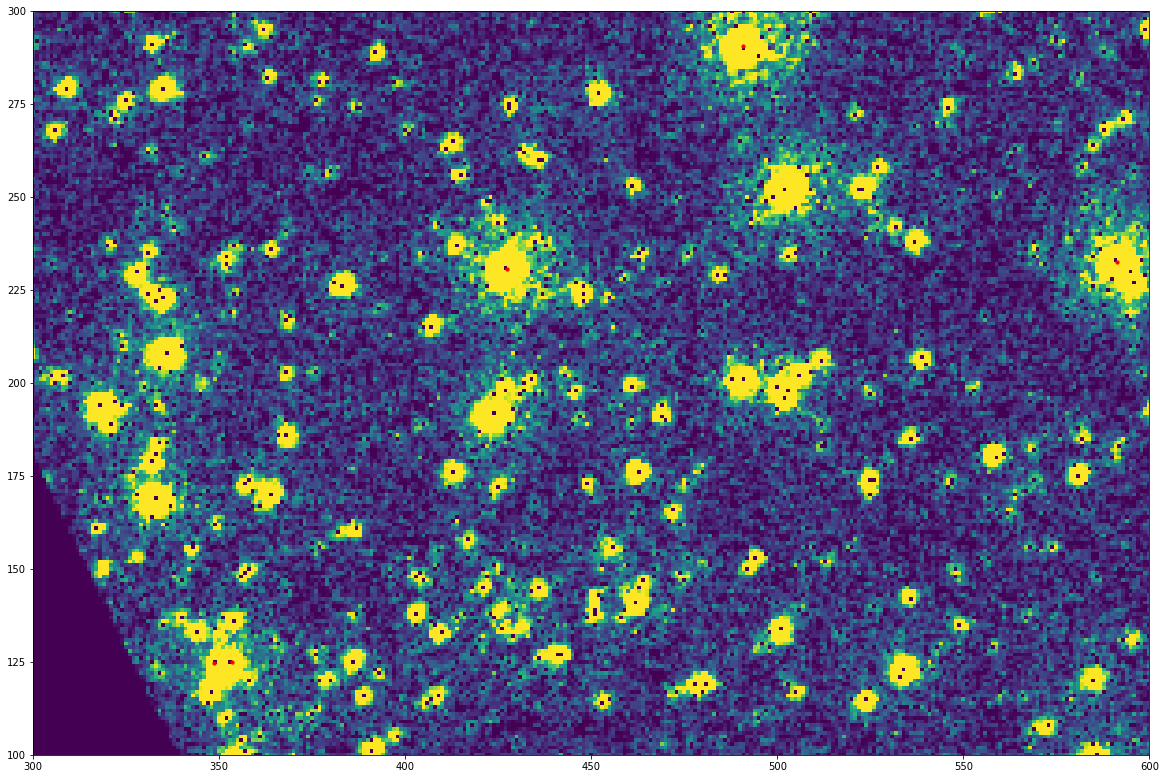

In [72]:
vmin,vmax = Z.get_limits(new_data)
plt.figure(figsize=(20,20))
plt.imshow(new_data,vmin=vmin,vmax=vmax)
plt.scatter(X,Y,s=10,c='r')
plt.xlim(300,600)
plt.ylim(150,350)